In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

#Template for operation

#'''data_path='ipl.csv'

#data=pd.read_csv(data_path)		
#print(data.describe())

#col=data.columns

#print(col)

#plt.show()'''

#'''df = pd.DataFrame({
#    'name':['john','mary','peter','jeff','bill','lisa','jose'],
#    'age':[23,78,22,19,45,33,20],
#    'gender':['M','F','M','M','M','F','M'],
#    'state':['california','dc','california','dc','california','texas','texas'],
#    'num_children':[2,0,0,3,2,1,4],
#    'num_pets':[5,1,0,5,2,2,3]
#})

#ax = plt.gca()

#df.plot(kind='line',x='name',y='num_children',ax=ax)
#df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

#plt.show()'''

In [126]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [127]:
fname=input("Enter filename:")

Enter filename:hello2.txt


In [128]:
#fread0=open(fname,"r")

#with fread0 as file0:     
#    for line0 in file0: 

#            for word0 in line0.split():
#                word00=deEmojify(word0)
                #print(word)

In [129]:
fread=open(fname,"r")

#data=fread.read() 

datadict={} #Dictionary for dataframe
xlabels=[] #List for xlabels

In [139]:
cwname=open("lists/google-10000-english-master/google-10000-english.txt","r")
cwlist=[]
with cwname as wfile:
    for wline in wfile:
        for cword in wline.split():
            cword2=cword.lower()
            cwlist.append(cword2)

#print(cwlist)            

In [131]:
symbols='!@#$%^&*()_+-={}|[]\:";<>?,./'
with fread as file:     
    for line in file: 
            linew=line.split()
            for word in linew:
                worde=deEmojify(word)
                wordf=worde.lower()
                word2=wordf.strip(symbols)
                #print(word)
                if word2 in datadict:
                    datadict[word2]+=1
                elif word2 not in cwlist:
                    datadict[word2]=1
                    xlabels.append(word2)      
            
#print(datadict)
#print("\n",xlabels)
#print("\n",len(a))
#print("\n")
#print(len(wa))

In [133]:
#print("The original dictionary is : " + str(test_dict)) 
  
# using items() to get all items  
# lambda function is passed in key to perform sort by key  
# passing 2nd element of items() 
#res = {key: val for key, val in sorted(datadict.items(), key = lambda ele: ele[1])} 
  
# printing result  
#print("Result dictionary sorted by values : " + str(res))  
  
# using items() to get all items  
# lambda function is passed in key to perform sort by key  
# passing 2nd element of items() 
# adding "reversed = True" for reversed order 
res = {key: val for key, val in sorted(datadict.items(), key = lambda ele: ele[1], reverse = True)} 
#dct=str(res)  
# printing result  
#print(res)
#print("Result dictionary sorted by values ( in reversed order ) : " + dct)

# Graphing to suggest possible keywords

In this phase, we obtain the most frequent non-common words in our text, which are possible candidates for being set as the article keyword. In the code below, we visualize the 10 most common keywords.

In [134]:
df=pd.DataFrame.from_dict([res])
df.describe()
col=df.columns
df=df.transpose()
headd=df.head(8)

/home/anuran/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


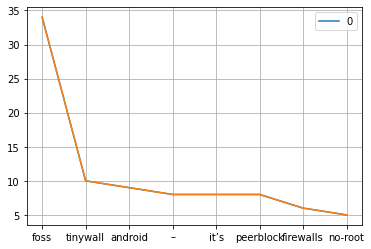

In [135]:
headd.plot(subplots = False, grid = True)
plt.plot(headd)
#plt.figure(figsize=(len(xlabels),100))

<AxesSubplot:>

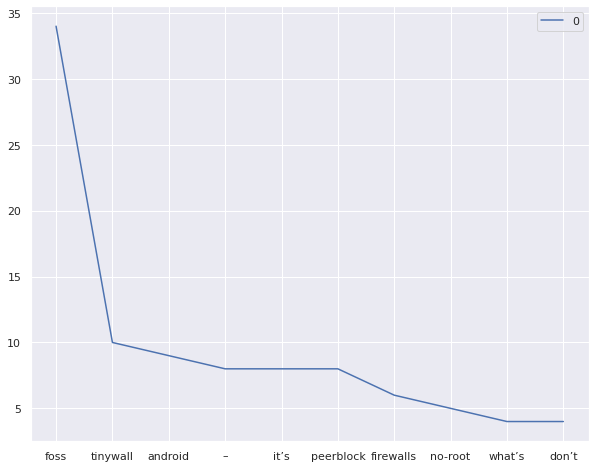

In [138]:
sns.set(rc={'figure.figsize':(10,8)})
sns.lineplot(data=df.head(10))